# 📊 Análisis Detallado de Partidos

Este cuaderno está orientado a realizar un análisis exploratorio más profundo de los **partidos**.
 
## Objetivos principales:
- Analizar cargas físicas por jugador (explosiva, sostenida, regenerativa).
- Identificar jugadores con mayor carga acumulada.
- Visualizar el rendimiento en cada partido.
- Detectar patrones y posibles riesgos de sobrecarga.

In [1]:
from pathlib import Path
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Creamos un método para categorizar el Rendimiento_vs_Entreno para tener una visualización 
# más clara de los resultados:
def categorizar_rve(rve):
    if pd.isna(rve):
        return "Sin baseline suficiente"
    elif rve > 250:
        return ">250% (posible baseline bajo o pico)"
    elif rve < 50:
        return "<50% (muy por debajo)"
    else:
        return "Normal"

In [2]:


# Configuración general
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(10,6)})

# Ruta a la base de datos
DB_PATH = Path(r'C:\\Users\\Nico\\Desktop\\DATA SCIENCE\\PP- VOLUNTAREADO\\chivas-ml\\data\\external\\chivas_dw.sqlite')


conn = sqlite3.connect(str(DB_PATH))

df_ent = pd.read_sql('SELECT * FROM DB_Entrenamientos', conn)

df_part = pd.read_sql_query("""
    SELECT 
        "id_jugador",
        "Rival", 
        "Fecha", 
        "Local_Visitante", 
        "Duracion_min",
        "Distancia_total", 
        "HSR_abs_m", 
        "HSR_rel_m", 
        "HMLD_m",
        "Sprints_distancia_m", 
        "Sprints_cantidad", 
        "Acc_3", 
        "Dec_3", 
        "Carga_Explosiva", 
        "Carga_Sostenida", 
        "Carga_Regenerativa",
        "Rendimiento_Partido", 
        "Rendimiento_vs_Entreno"
    FROM DB_Partidos
    """, conn)

# Cargar tabla jugadores
df_jug = pd.read_sql("SELECT * FROM DB_Jugadores", conn)

# Normalizar nombres de columnas
df_jug.columns = df_jug.columns.str.strip().str.lower().str.replace(' ', '_')

# Unir entrenamientos con nombres de jugadores
df_part = df_part.merge(df_jug[['id_jugador','nombre','linea']], on='id_jugador', how='left')

#Agregamos la columna RvE_flag
df_part["RvE_flag"] = df_part["Rendimiento_vs_Entreno"].apply(categorizar_rve)

# Definí el orden que querés
column_order = [
    "Rival", "Fecha", "nombre", "linea", "Local_Visitante", "Duracion_min",
    "Distancia_total", "HSR_abs_m", "HSR_rel_m", "HMLD_m",
    "Sprints_distancia_m", "Sprints_cantidad", 
    "Acc_3", "Dec_3", 
    "Carga_Explosiva", "Carga_Sostenida", "Carga_Regenerativa",
    "Rendimiento_Partido", "Rendimiento_vs_Entreno", "RvE_flag"
]

# Reordenar (y mantener las que no estén en column_order al final)
df_part = df_part[[col for col in column_order if col in df_part.columns] + 
                  [c for c in df_part.columns if c not in column_order]]

df_part





,Rival,Fecha,nombre,linea,Local_Visitante,Duracion_min,Distancia_total,HSR_abs_m,HSR_rel_m,HMLD_m,...,Sprints_cantidad,Acc_3,Dec_3,Carga_Explosiva,Carga_Sostenida,Carga_Regenerativa,Rendimiento_Partido,Rendimiento_vs_Entreno,RvE_flag,id_jugador
0,CHARLOTTE,2025-08-03,Roberto Alvarado,Extremo,Visitante,79.0,9225,896.0,45.0,2142,...,17,37,64,1431.2,2142.0,3093.5,100.000000,208.709530,Normal,25
1,SAN LUIS,2025-07-26,Roberto Alvarado,Extremo,Local,101.0,11287,682.0,92.0,2115,...,7,47,77,1186.9,2115.0,4245.0,100.000000,200.039981,Normal,25
2,LEON,2025-07-19,Roberto Alvarado,Extremo,Visitante,99.0,11262,560.0,112.0,2077,...,9,41,94,1075.0,2077.0,4312.5,100.000000,200.513112,Normal,25
3,NEW YORK RB,2025-07-31,Roberto Alvarado,Extremo,Visitante,104.0,11277,581.0,174.0,2191,...,10,35,57,994.7,2191.0,4252.5,100.000000,200.988486,Normal,25
4,SANTOS,2025-08-10,Roberto Alvarado,Extremo,Visitante,109.0,11759,635.0,92.0,2197,...,14,49,85,1191.5,2197.0,4463.5,100.000000,250.000000,Normal,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,CRUZ AZUL,2025-08-30,Luis Romo,Medio Ofensivo,Local,86.0,12813,551.0,NaN,1990,...,12,47,65,1024.7,1990.0,5136.0,100.000000,250.000000,Normal,18
144,CRUZ AZUL,2025-08-30,Miguel Gómez,Defensa Lateral,Local,34.0,2808,187.0,NaN,547,...,6,12,22,345.4,547.0,1037.0,15.932817,41.433342,<50% (muy por debajo),11
145,CRUZ AZUL,2025-08-30,Santiago Sandoval,Medio Ofensivo,Local,79.0,9194,628.0,NaN,1931,...,14,36,79,1129.1,1931.0,3317.5,100.000000,150.488545,Normal,31
146,CRUZ AZUL,2025-08-30,Miguel Tapias,Defensa Central,Local,72.0,7730,342.0,NaN,1565,...,6,35,42,650.4,1565.0,2911.5,91.119870,250.000000,Normal,6


### En la base de datos, podemos visualizar las medidas tomadas satelitalmente de los jugadores en los partidos. Comenzamos cargando los datos de DB_Partidos y DB_Entrenamientos (que utilizaremos más adelante) y.visualizamos la tabla. Ordenamos las columnas para que se visualicen lo nombres de los jugadores (que mergeamos de DB_Jugadores) y los Rivales. También agregamos la tabla RvE_flag para tener una visualización más clara del rendimiento de los jugadores

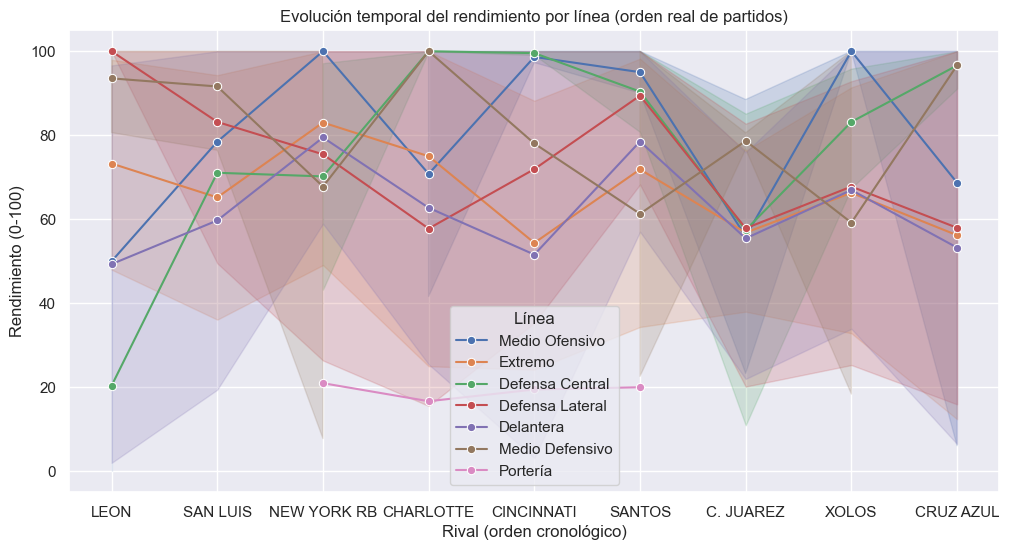

In [3]:
# Aseguramos que Fecha sea datetime
df_part["Fecha"] = pd.to_datetime(df_part["Fecha"], errors="coerce")

# Ordenamos por fecha
df_sorted = df_part.sort_values("Fecha")

# Creamos una columna "Rival_ordenado" que respete el orden cronológico
df_sorted["Rival_ordenado"] = pd.Categorical(
    df_sorted["Rival"], 
    categories=df_sorted.sort_values("Fecha")["Rival"].unique(), 
    ordered=True
)

plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_sorted,
    x="Rival_ordenado", 
    y="Rendimiento_Partido", 
    hue="linea", 
    marker="o"
)
plt.title("Evolución temporal del rendimiento por línea (orden real de partidos)")
plt.ylabel("Rendimiento (0-100)")
plt.xlabel("Rival (orden cronológico)")
plt.legend(title="Línea")
plt.show()


### Realizo un lineplot para visualizar el rendimiento del equipo en los partidos jugados. Este Rendimiento_Partido se determina del historial de rendimientos en la totalidad de los partidos y se cuantifica del 0 a 100. 

### Podemos observar variaciones de las líneas en los diferentes partidos con un notorio descenso contra C Juarez. Hablando con el PF me comentó que en ese caso en particular, el rival se mantuvo totalmente a la defensiva lo que produjo un juego sin grande gastos energéticos. Sin embargo vamos a seguir analizando para ver si hay otros factores que estén generando estos resultados.

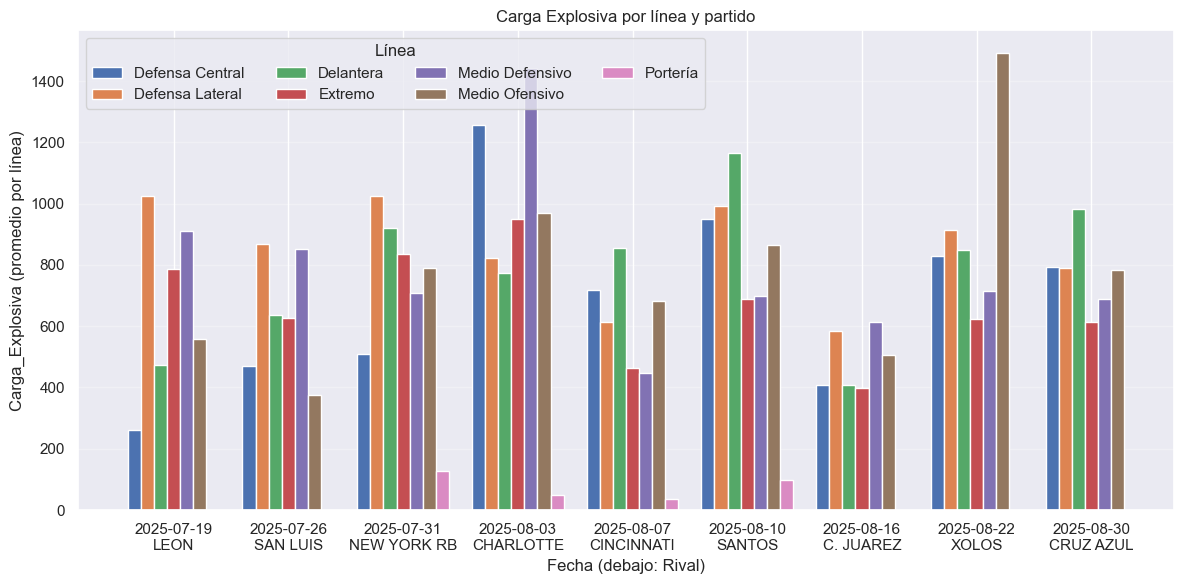

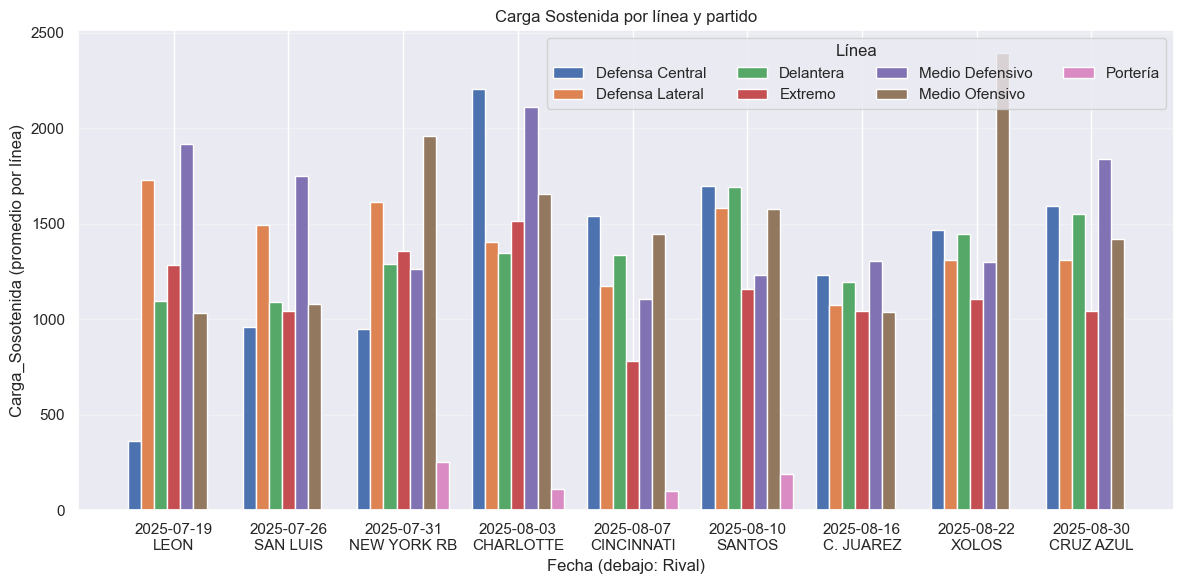

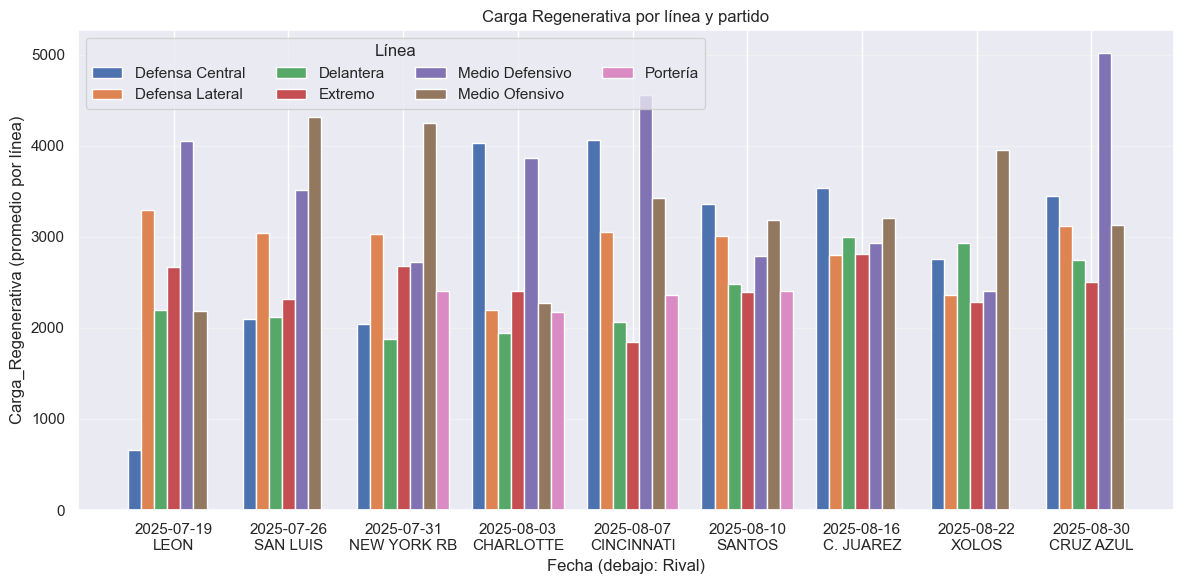

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- Normalizar nombres de columnas por si vienen en snake_case/minúsculas ---
cols = {c.lower(): c for c in df_part.columns}
def col(name):  # devuelve el nombre real de la columna en el DF
    return cols.get(name.lower(), name)

# Asegurar tipos y ordenar
df_part[col("Fecha")] = pd.to_datetime(df_part[col("Fecha")], errors="coerce")
dfp = df_part.dropna(subset=[col("Fecha")]).copy()
dfp = dfp.sort_values(col("Fecha"))

# --- Agregar por Partido (Fecha) x Línea: promedio de CE, CS, CR ---
agg = (dfp
       .groupby([col("Fecha"), col("Rival"), col("linea")], as_index=False)
       .agg(CE=(col("Carga_Explosiva"), "mean") if col("Carga_Explosiva") in dfp.columns else ("Carga_Explosiva", "mean"),
            CS=(col("Carga_Sostenida"), "mean") if col("Carga_Sostenida") in dfp.columns else ("Carga_Sostenida", "mean"),
            CR=(col("Carga_Regenerativa"), "mean") if col("Carga_Regenerativa") in dfp.columns else ("Carga_Regenerativa", "mean")))

# Orden temporal y etiquetas Fecha + Rival
agg = agg.sort_values(col("Fecha"))
fecha_col = col("Fecha")
rival_col = col("Rival")
linea_col = col("linea")

# build etiquetas "YYYY-MM-DD\nRival" por fecha (modo del rival por si hay duplicados)
rival_por_fecha = (agg[[fecha_col, rival_col]]
                   .drop_duplicates(subset=[fecha_col])
                   .set_index(fecha_col)[rival_col])
fechas_orden = agg[fecha_col].drop_duplicates().tolist()
tick_labels = [f"{f.strftime('%Y-%m-%d')}\n{rival_por_fecha.get(f, '')}" for f in fechas_orden]

# Helper: gráfico de barras agrupadas para una métrica
def plot_barras_agrupadas(df, value_col, title, ylabel):
    # pivot: filas=Fecha, cols=Línea, valores=value_col
    pvt = (df.pivot_table(index=fecha_col, columns=linea_col, values=value_col, aggfunc='mean')
             .reindex(index=fechas_orden))
    lineas = list(pvt.columns)
    x = np.arange(len(pvt.index), dtype=float)

    width = 0.8 / max(1, len(lineas))  # ancho de cada barra
    fig, ax = plt.subplots(figsize=(12, 6))

    for i, lin in enumerate(lineas):
        y = pvt[lin].values
        ax.bar(x + i*width - 0.4 + width/2, y, width=width, label=str(lin))

    # ejes/etiquetas
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Fecha (debajo: Rival)")
    ax.set_xticks(x)
    ax.set_xticklabels(tick_labels, rotation=0, ha='center')
    ax.legend(title="Línea", ncol=min(4, len(lineas)))
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# --- Graficar CE, CS, CR (tres gráficos, uno por métrica) ---
plot_barras_agrupadas(agg, "CE", "Carga Explosiva por línea y partido", "Carga_Explosiva (promedio por línea)")
plot_barras_agrupadas(agg, "CS", "Carga Sostenida por línea y partido", "Carga_Sosotenida (promedio por línea)")
plot_barras_agrupadas(agg, "CR", "Carga Regenerativa por línea y partido", "Carga_Regenerativa (promedio por línea)")



### El PF nos solicitó un gráfico para visualizar la carga explosiva, Sostenida y Regenerativa en cada partido. Por lo que utilizamos gráfico de barras para visualizar de forma clara estos parámetros.

### Claramente podemos visualizar que Chivas de Guadalajara presenta medidas bajas tanto en su carga Explosiva como en la carga Sostenida frente a C Juarez. Otro dato relevante que podemos apreciar es que La línea de Medio Ofensivo tubo una carga excesiva en las tres cargas jugando contra Xolos. Esta sobrecarga en la línea hay que tenerla en cuenta para evitar lesiones.

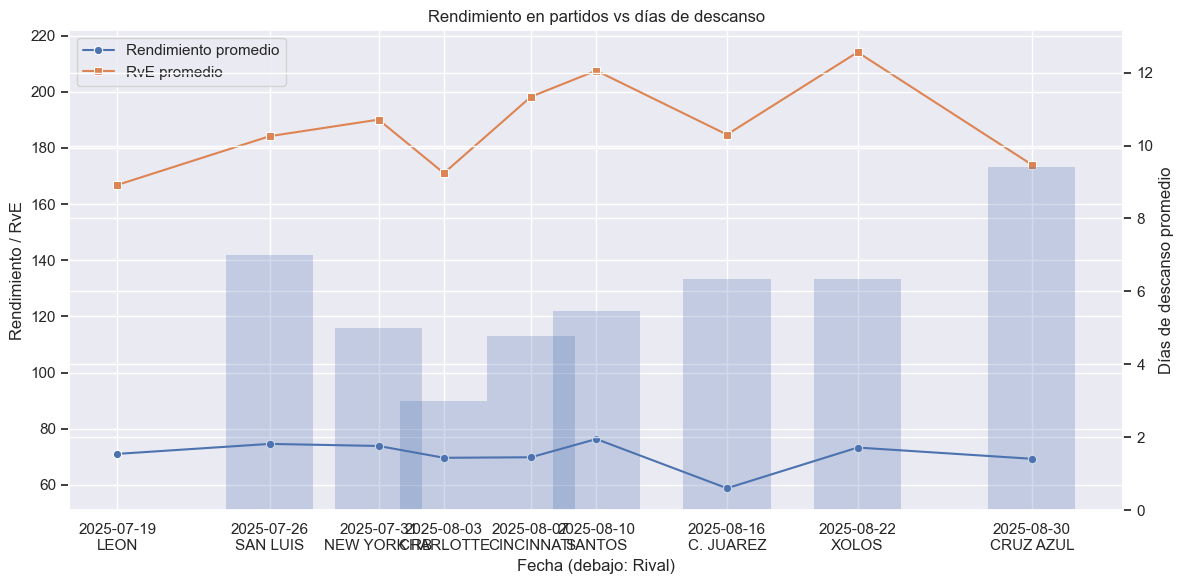

,Fecha,Rival,Rend_Partido_Prom,RvE_prom,descanso_prom,descanso_min
0,2025-07-19,LEON,71.064821,166.806967,NaN,NaN
1,2025-07-26,SAN LUIS,74.621851,184.176245,7.000000,7.0
2,2025-07-31,NEW YORK RB,73.886927,190.071523,5.000000,5.0
3,2025-08-03,CHARLOTTE,69.679054,171.017259,3.000000,3.0
4,2025-08-07,CINCINNATI,69.862237,198.235101,4.785714,4.0
5,2025-08-10,SANTOS,76.358902,207.507556,5.470588,3.0
6,2025-08-16,C. JUAREZ,58.832715,184.744529,6.352941,6.0
7,2025-08-22,XOLOS,73.325155,214.070270,6.352941,6.0
8,2025-08-30,CRUZ AZUL,69.320332,174.035263,9.400000,8.0


In [5]:
# --- asegurar datetime y ordenar ---
df_part["Fecha"] = pd.to_datetime(df_part["Fecha"], errors="coerce")
df_part = df_part.sort_values(["id_jugador", "Fecha"])

# --- días de descanso por jugador ---
df_part["days_since_last"] = df_part.groupby("id_jugador")["Fecha"].diff().dt.days

# --- resumen por partido (por fecha) ---
def _mode_or_first(s):
    s = s.dropna()
    if s.empty: 
        return np.nan
    # modo si hay, si no, primero
    try:
        m = s.mode()
        return m.iloc[0] if not m.empty else s.iloc[0]
    except Exception:
        return s.iloc[0]

df_match_summary = (df_part
    .groupby("Fecha")
    .agg(
        Rival=("Rival", _mode_or_first),
        Rend_Partido_Prom=("Rendimiento_Partido", "mean"),
        RvE_prom=("Rendimiento_vs_Entreno", "mean"),
        descanso_prom=("days_since_last", "mean"),
        descanso_min=("days_since_last", "min")
    )
    .reset_index()
    .sort_values("Fecha")
)

# --- etiquetas Fecha + Rival para los ticks ---
tick_labels = [f"{d.strftime('%Y-%m-%d')}\n{r}" for d, r in zip(df_match_summary["Fecha"], df_match_summary["Rival"])]

# --- gráfico combinado: líneas + barras ---
fig, ax1 = plt.subplots(figsize=(12,6))

# líneas (eje izquierdo)
sns.lineplot(data=df_match_summary, x="Fecha", y="Rend_Partido_Prom", marker="o", label="Rendimiento promedio", ax=ax1)
sns.lineplot(data=df_match_summary, x="Fecha", y="RvE_prom", marker="s", label="RvE promedio", ax=ax1)

ax1.set_ylabel("Rendimiento / RvE")
ax1.set_xlabel("Fecha (debajo: Rival)")
ax1.set_title("Rendimiento en partidos vs días de descanso")

# formato de fechas en x
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.set_xticks(df_match_summary["Fecha"])
ax1.set_xticklabels(tick_labels, rotation=0, ha="center")

# barras (eje derecho) -> usar matplotlib, no seaborn
ax2 = ax1.twinx()
ax2.bar(
    df_match_summary["Fecha"],
    df_match_summary["descanso_prom"],
    width=4,          # ~4 días de ancho, ajustá a gusto
    alpha=0.25,
    align="center",
    edgecolor="none"
)
ax2.set_ylabel("Días de descanso promedio")

# límites amables para ver bien las barras
if df_match_summary["descanso_prom"].notna().any():
    ymax = float(df_match_summary["descanso_prom"].max())
    ax2.set_ylim(0, max(7, ymax * 1.4))

plt.tight_layout()
plt.show()

# --- opcional: mostrar la tabla resumen con rival ---
df_match_summary



### Evaluamos el descanso del equipo para ver si influye con el rendimeinto (tanto Rendimiento_Partido como Rendimiento_vs_Entreno). Utilizamos un gráfico mixto con líneas para ver estos dos parámetros y barras para visualizar los días de descanso entre partido y partido. Más abajo podemos observar una tabla con las datos promedios de los rendimientos junto con los días de descanso.

#### Rendimeinto_vs_Entreno: Es un índice relativo, compara lo que rindió el jugador en el partido con respecto a su baseline de entrenamientos recientes.
#### a) Baseline de entrenamientos:
#### • Mediana de los últimos 21 días previos.
#### • Si no hay suficientes datos, mediana de 60 días previos.
#### • Si aún no hay, mediana histórica del jugador.

### En esta gráfica podemos visualizar dos tipos de descanso, el minimo y el promedio. Ya que si bien tenemos X días entre un partido y otro no siempre juegan los mismos jugadores, por esta razón la medida que nos interesa en este caso es el descanso promedio. Tendiendo estos valores podemos visualizar que efectivamente donde hubo menos descanso promedio en el equipo es donde hubo una disminución del rendimiento (Contra Charlotte). Este descenso lo podemos visualizar justamente en el Rendimiento_vs_Entreno que nos marca como se desempeñó el jugador en base a su baseline de entrenamiento.
### Igualmente esto no es un factor descicivo para determinar el rendimiento pero si se debe tener en cuenta.

In [6]:
df_ent

,id_entrenamiento,id_jugador,Fecha,Distancia_total,HSR_abs_m,HMLD_m,Sprints_distancia_m,Acc_3,Dec_3,Player_Load,RPE,Carga_Explosiva,Carga_Sostenida,Carga_Regenerativa,Rendimiento_Diario,HSR_rel_m,Sprints_cantidad,Sprints_vel_max_kmh,Velocidad_prom_m_min
0,1,25,2025-05-23,3294,0,170,0,7,1,49,NaN,23.5,179.8,1562.0,7.710410,0,0,18.3,92
1,2,25,2025-05-24,3707,138,512,0,8,6,60,NaN,204.6,524.0,1528.5,35.986824,0,0,22.1,75
2,3,25,2025-05-26,2281,0,284,0,39,22,31,0.0,172.0,290.2,998.5,9.921122,0,0,20.5,95
3,4,25,2025-05-27,4821,142,638,25,36,27,49,0.0,350.9,647.8,2020.5,34.234879,0,1,25.5,100
4,5,25,2025-05-28,4523,165,741,54,54,30,70,0.0,450.0,755.0,1808.5,40.668390,7,3,26.7,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612,1613,27,2025-08-20,5190,70,865,25,27,32,89,NaN,250.0,882.8,2127.5,22.272715,19,1,27.1,68
1613,1614,27,2025-08-21,2263,22,167,0,6,7,35,NaN,61.9,174.0,1037.0,0.000000,0,0,23.9,31
1614,1615,27,2025-08-25,4258,63,768,0,28,33,75,NaN,242.1,783.0,1713.5,14.556548,0,0,23.6,90
1615,1616,27,2025-08-26,4918,213,804,26,14,19,72,NaN,355.1,818.4,1950.5,24.360859,0,2,25.4,74


### Vamos a utilizar los entrenamientos para evaluar si influye en el rendimeinto de los jugadores. Imprimimos la tabla para ver si se cargaron bien los datos

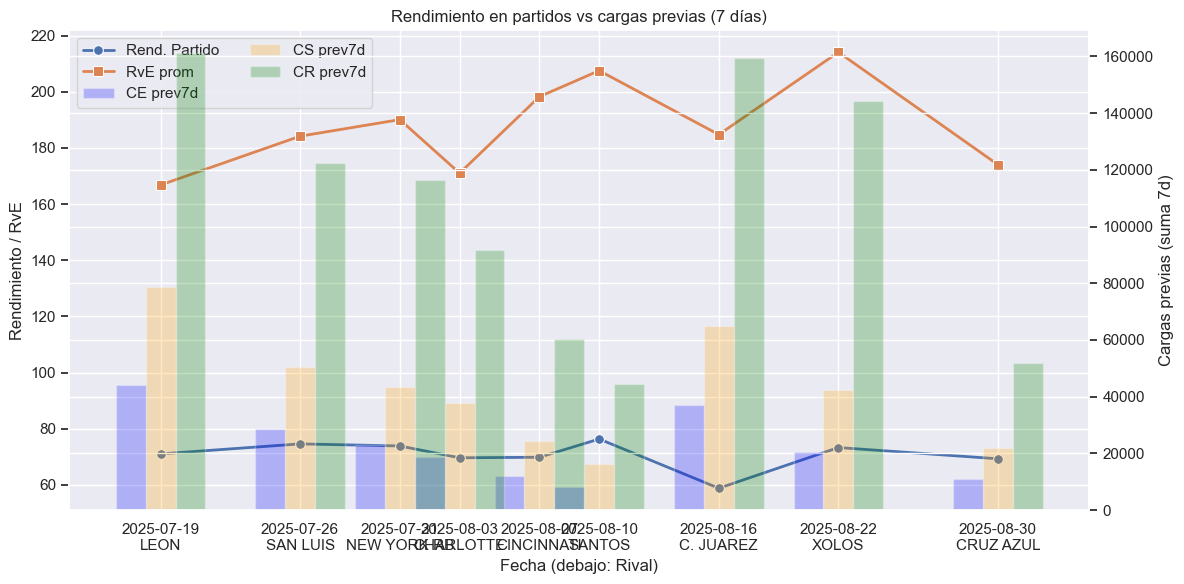

In [7]:
import matplotlib.dates as mdates

# --- Asegurar fechas ---
df_part["Fecha"] = pd.to_datetime(df_part["Fecha"], errors="coerce")
df_ent["Fecha"]  = pd.to_datetime(df_ent["Fecha"],  errors="coerce")

# --- Alinear tipos de id_jugador (por si vienen como str) ---
for _df in (df_part, df_ent):
    if "id_jugador" in _df.columns:
        _df["id_jugador"] = pd.to_numeric(_df["id_jugador"], errors="coerce").astype("Int64")

# --- Helper de alias por nombre exacto o parecido (case-insensitive) ---
def pick(colnames, *candidatos):
    low = {c.lower(): c for c in colnames}
    for c in candidatos:
        if c in colnames:                return c
        if c.lower() in low:             return low[c.lower()]
    return None

# Entrenos: mapeo a tus nombres
COL_FECHA_E  = pick(df_ent.columns, "Fecha")
COL_ID_E     = pick(df_ent.columns, "id_jugador", "Id_Jugador", "ID_JUGADOR")
COL_CE_E     = pick(df_ent.columns, "Carga_Explosiva", "CE")
COL_CS_E     = pick(df_ent.columns, "Carga_Sosotenida", "Carga_Sostenida", "CS")  # acepta el typo y el correcto
COL_CR_E     = pick(df_ent.columns, "Carga_Regenerativa", "CR")
COL_REND_E   = pick(df_ent.columns, "Rendimiento_Diario", "Rendimiento_Partido")  # fallback si no está el diario

# Partidos
COL_FECHA_P  = pick(df_part.columns, "Fecha")
COL_ID_P     = pick(df_part.columns, "id_jugador", "Id_Jugador", "ID_JUGADOR")
COL_RIVAL_P  = pick(df_part.columns, "Rival")
COL_REND_P   = pick(df_part.columns, "Rendimiento_Partido")
COL_RVE_P    = pick(df_part.columns, "Rendimiento_vs_Entreno")

# Sanity mínimo
needed = [COL_FECHA_E, COL_ID_E, COL_CE_E, COL_CS_E, COL_CR_E, COL_FECHA_P, COL_ID_P, COL_RIVAL_P, COL_REND_P]
assert all(x is not None for x in needed), "Faltan columnas necesarias; revisá nombres."

# --- Cruce por partido: carga de los 7 días previos de los jugadores que participaron ---
records = []
for fpart, g in df_part.groupby(COL_FECHA_P):
    if pd.isna(fpart): 
        continue
    f_inicio = fpart - pd.Timedelta(days=7)
    jugadores = g[COL_ID_P].dropna().unique()
    riv = g[COL_RIVAL_P].dropna().mode().iloc[0] if not g[COL_RIVAL_P].dropna().empty else None

    df_prev = df_ent[
        (df_ent[COL_ID_E].isin(jugadores)) &
        (df_ent[COL_FECHA_E] >= f_inicio) &
        (df_ent[COL_FECHA_E] <  fpart)
    ]

    ce_sum = df_prev[COL_CE_E].sum() if not df_prev.empty else np.nan
    cs_sum = df_prev[COL_CS_E].sum() if not df_prev.empty else np.nan
    cr_sum = df_prev[COL_CR_E].sum() if not df_prev.empty else np.nan
    rend_ent_prom = df_prev[COL_REND_E].mean() if (COL_REND_E in df_prev.columns and not df_prev.empty) else np.nan

    records.append({
        "Fecha": fpart,
        "Rival": riv,
        "Rend_Partido_Prom": g[COL_REND_P].mean(),
        "RvE_prom": g[COL_RVE_P].mean() if COL_RVE_P else np.nan,
        "CE_prev7d": ce_sum,
        "CS_prev7d": cs_sum,
        "CR_prev7d": cr_sum,
        "Rend_Entreno_Prev7d": rend_ent_prom
    })

df_match_training = pd.DataFrame(records).sort_values("Fecha")

# --- Etiquetas eje X: Rival + Fecha (o dejá solo Rival si querés) ---
labels_fecha_rival = [f"{d.strftime('%Y-%m-%d')}\n{r}" for d, r in zip(df_match_training["Fecha"], df_match_training["Rival"])]
labels_solo_rival  = df_match_training["Rival"].tolist()  # mantiene el orden cronológico por estar sorteado por Fecha

# ===================== GRÁFICO COMBINADO =====================
fig, ax1 = plt.subplots(figsize=(12,6))

# --- Líneas: rendimiento partido y RvE ---
sns.lineplot(data=df_match_training, x="Fecha", y="Rend_Partido_Prom",
             marker="o", markersize=7, linewidth=2, label="Rend. Partido", ax=ax1)
sns.lineplot(data=df_match_training, x="Fecha", y="RvE_prom",
             marker="s", markersize=7, linewidth=2, label="RvE prom", ax=ax1)

ax1.set_ylabel("Rendimiento / RvE")
ax1.set_xlabel("Fecha (debajo: Rival)")
ax1.set_title("Rendimiento en partidos vs cargas previas (7 días)")

# Reemplazo ticks por etiqueta combinada Fecha+Rival
ax1.set_xticks(df_match_training["Fecha"])
labels_fecha_rival = [f"{d.strftime('%Y-%m-%d')}\n{r}" for d, r in zip(df_match_training["Fecha"], df_match_training["Rival"])]
ax1.set_xticklabels(labels_fecha_rival, rotation=0, ha="center")

# --- Barras: CE/CS/CR previos ---
ax2 = ax1.twinx()
x = mdates.date2num(df_match_training["Fecha"])

# ancho más chico
w = 1.5  

ax2.bar(x - w, df_match_training["CE_prev7d"], width=w, alpha=0.25, label="CE prev7d", color="blue")
ax2.bar(x,     df_match_training["CS_prev7d"], width=w, alpha=0.25, label="CS prev7d", color="orange")
ax2.bar(x + w, df_match_training["CR_prev7d"], width=w, alpha=0.25, label="CR prev7d", color="green")

ax2.set_ylabel("Cargas previas (suma 7d)")

# --- Leyenda combinada ---
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc="upper left", ncol=2)

plt.tight_layout()
plt.show()


### Generamos una gráfica mixta conde observamos líneas que representan el Rendimiento_Partidos y el Rendimiento_vs_Entreno. y Un gráfico de barras que representan la carga explosiva, Sostenida y Regenerativa del entrenamiento realizado los últimos 7 días previos al partido. 

### Esta gráfica se vuelve sumamente relevante ya que al cruzar dos tablas con diferentes datos podemos apreciar su conexión. Las semanas donde las cargas explosivas y sostenidas fueron elevadas generaron un descenso en el rendimiento del equipo. En los partidos donde se jugaron con pocos días de descanso y se realizó un rentenamiento de recuperación, el equipo rindió favorablemente. Podemos observar como el aumento en el entrenamiento previó al partido contra C. Juarez fue perjudicial para el desempeño del equipo. Luego de este partido la exigencia en el entrenamiento volvió a bajar mostrando resultados favorables en el rendimiento. Sin embargo, esta tendencia no continuó con el último partido, donde si bien el entrenamiento previo disminuyó también lo hizo el rendimiento del equipo frente a Cruz Azul. 
### En estos casos existen factores externos que influyen, como el tipo de juego y el rival que son apreciasiones que no podemos visualizar con los datos que tenemos.

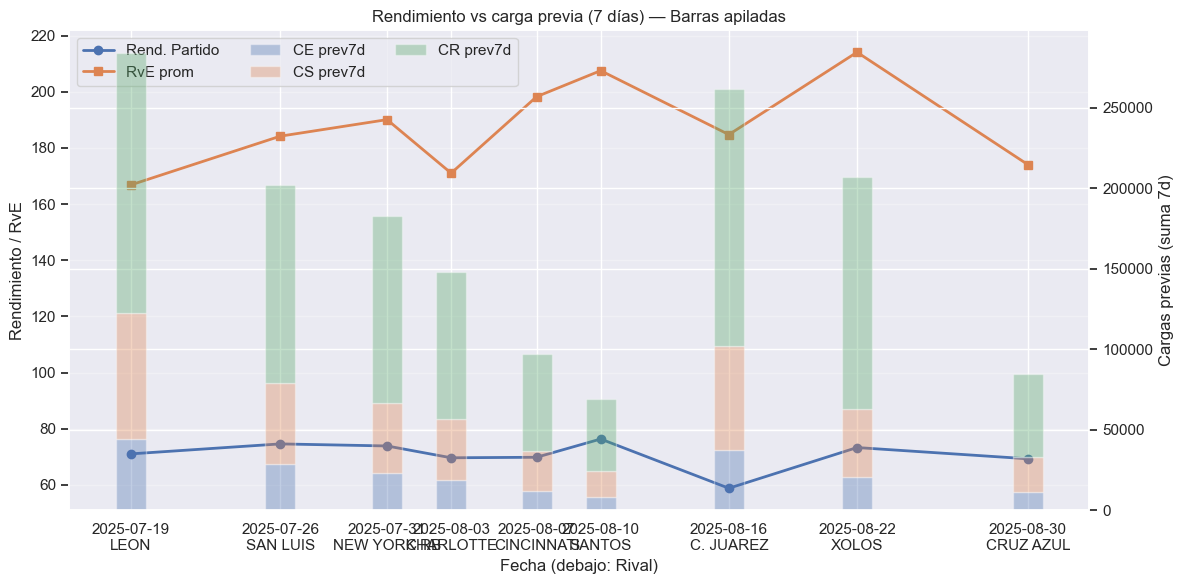

In [8]:

# Columnas necesarias
for c in ["Fecha","Rival","CE_prev7d","CS_prev7d","CR_prev7d","Rend_Partido_Prom","RvE_prom"]:
    assert c in df_match_training.columns, f"Falta la columna {c} en df_match_training"

dfm = df_match_training.sort_values("Fecha").copy()
x = mdates.date2num(dfm["Fecha"])
labels = [f"{d.strftime('%Y-%m-%d')}\n{r}" for d, r in zip(dfm["Fecha"], dfm["Rival"])]

w = 1.4  # un poco más finas

fig, ax1 = plt.subplots(figsize=(12,6))

# ----- LÍNEAS (eje izquierdo) -----
ax1.plot(dfm["Fecha"], dfm["Rend_Partido_Prom"], marker="o", linewidth=2, label="Rend. Partido")
ax1.plot(dfm["Fecha"], dfm["RvE_prom"],           marker="s", linewidth=2, label="RvE prom")
ax1.set_ylabel("Rendimiento / RvE")
ax1.set_xlabel("Fecha (debajo: Rival)")
ax1.set_title("Rendimiento vs carga previa (7 días) — Barras apiladas")

# ticks personalizados
ax1.set_xticks(dfm["Fecha"])
ax1.set_xticklabels(labels, rotation=0, ha="center")

# ----- BARRAS APILADAS (eje derecho) -----
ax2 = ax1.twinx()
ce = dfm["CE_prev7d"].fillna(0)
cs = dfm["CS_prev7d"].fillna(0)
cr = dfm["CR_prev7d"].fillna(0)

ax2.bar(x, ce, width=w, alpha=0.35, label="CE prev7d")
ax2.bar(x, cs, width=w, alpha=0.35, bottom=ce, label="CS prev7d")
ax2.bar(x, cr, width=w, alpha=0.35, bottom=(ce+cs), label="CR prev7d")
ax2.set_ylabel("Cargas previas (suma 7d)")

# Leyenda combinada
h1,l1 = ax1.get_legend_handles_labels()
h2,l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc="upper left", ncol=3)

ax1.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()



### Realicé una gráfica similar que con barras apiladas para que el PF pueda visualizar el total de la carga (sumatoria de las tres cargas) previas al partido. 

In [9]:
# ===== Preparación / sanity checks =====
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Encontrar columna de nombre de jugador
col_nombre = None
for c in ["nombre", "Nombre", "jugador", "Jugador"]:
    if c in df_part.columns:
        col_nombre = c
        break
if col_nombre is None:
    raise ValueError("No encuentro columna de nombre de jugador (nombre/Nombre/jugador/Jugador).")

# Tipos y orden
if "Fecha" in df_part.columns:
    df_part["Fecha"] = pd.to_datetime(df_part["Fecha"], errors="coerce")
df_part = df_part.sort_values(["id_jugador", "Fecha"], kind="mergesort")

# Local/Visitante normalizado
if "local_visitante" in df_part.columns:
    df_part["local_visitante"] = df_part["local_visitante"].str.strip().str.lower().map({
        "l": "Local", "local": "Local",
        "v": "Visitante", "visitante": "Visitante",
    }).fillna(df_part["local_visitante"])

# RvE continuo (si no existe numérico)
if "Rendimiento_vs_Entreno" in df_part.columns:
    df_part["RvE_pct"] = pd.to_numeric(df_part["Rendimiento_vs_Entreno"], errors="coerce")
else:
    # fallback si viene como RvE
    if "RvE" in df_part.columns:
        df_part["RvE_pct"] = pd.to_numeric(df_part["RvE"], errors="coerce")
    else:
        df_part["RvE_pct"] = np.nan

# Flag categórico consistente
if "RvE_flag" not in df_part.columns:
    def _cat_rve(x):
        if pd.isna(x): return "Sin base"
        if x >= 250:   return "Alto (≥250%)"
        if x >= 150:   return "Moderado (150–249%)"
        return "OK (<150%)"
    df_part["RvE_flag"] = df_part["RvE_pct"].apply(_cat_rve)

# Carpeta de export
export_dir = "exports_partidos"
os.makedirs(export_dir, exist_ok=True)

# Paletas y estilos
sns.set(style="whitegrid", context="notebook")

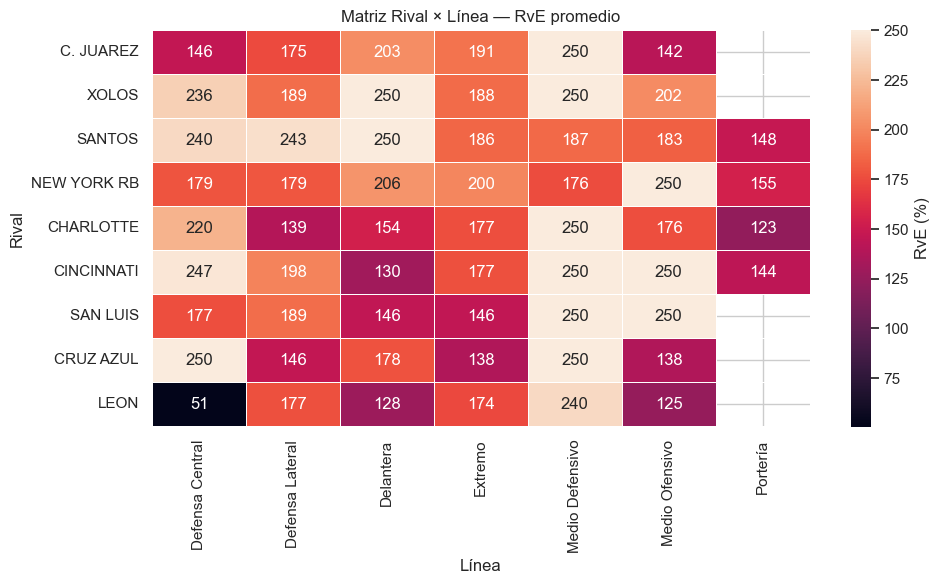

,Rival,linea,RvE_pct,n
0,C. JUAREZ,Defensa Central,146.264965,3
1,C. JUAREZ,Defensa Lateral,174.748705,4
2,C. JUAREZ,Delantera,202.954545,4
3,C. JUAREZ,Extremo,191.143848,6
4,C. JUAREZ,Medio Defensivo,250.000000,2
5,C. JUAREZ,Medio Ofensivo,141.582066,2
6,CHARLOTTE,Defensa Central,220.422346,2
7,CHARLOTTE,Defensa Lateral,138.753131,4
8,CHARLOTTE,Delantera,154.149883,2
9,CHARLOTTE,Extremo,176.581397,4


In [10]:
# Ordenar rivales por frecuencia
riv_freq = df_part["Rival"].value_counts().index.tolist()
pivot_rve = (df_part
             .groupby(["Rival", "linea"], as_index=False)["RvE_pct"]
             .mean())
pivot_cnt = (df_part
             .groupby(["Rival", "linea"], as_index=False)["RvE_pct"]
             .size()
             .rename(columns={"size": "n"}))

heat = pivot_rve.pivot_table(index="Rival", columns="linea", values="RvE_pct")
heat = heat.reindex(riv_freq)  # por frecuencia

plt.figure(figsize=(10, max(6, 0.4*len(heat))))
sns.heatmap(heat, annot=True, fmt=".0f", linewidths=.5, cbar_kws={"label": "RvE (%)"})
plt.title("Matriz Rival × Línea — RvE promedio")
plt.xlabel("Línea")
plt.ylabel("Rival")
plt.tight_layout()
plt.show()

# Export tabla con conteos también
tbl_rival = (pivot_rve.merge(pivot_cnt, on=["Rival","linea"], how="left")
             .sort_values(["Rival","linea"]))
tbl_rival.to_csv(f"{export_dir}/rival_linea_rve_promedio_conteo.csv", index=False)
tbl_rival.head(10)

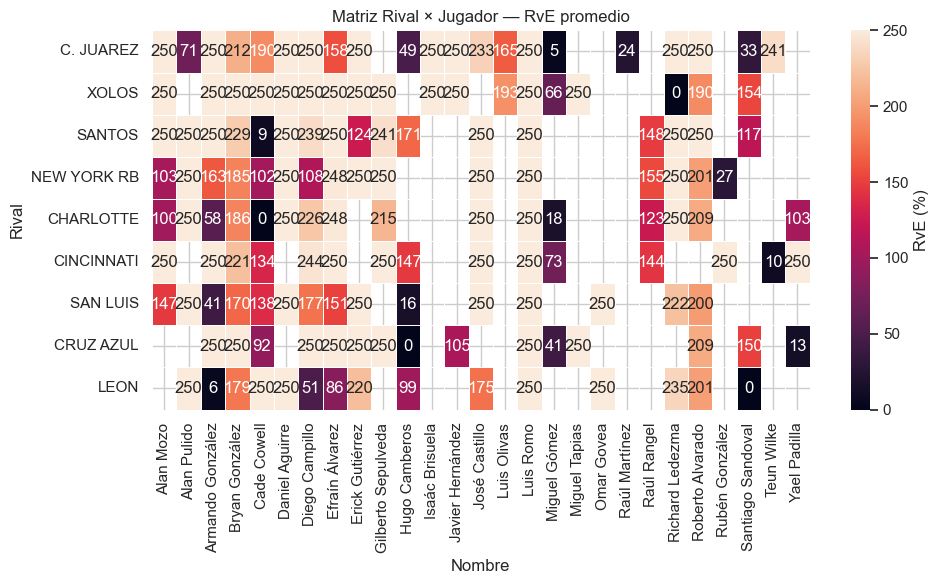

,Rival,nombre,RvE_pct,n
0,C. JUAREZ,Alan Mozo,250.000000,1
1,C. JUAREZ,Alan Pulido,70.732691,1
2,C. JUAREZ,Armando González,250.000000,1
3,C. JUAREZ,Bryan González,211.616620,1
4,C. JUAREZ,Cade Cowell,190.248353,1
5,C. JUAREZ,Daniel Aguirre,250.000000,1
6,C. JUAREZ,Diego Campillo,250.000000,1
7,C. JUAREZ,Efraín Álvarez,157.920006,1
8,C. JUAREZ,Erick Gutiérrez,250.000000,1
9,C. JUAREZ,Hugo Camberos,48.694731,1


In [11]:
# Ordenar rivales por frecuencia
riv_freq = df_part["Rival"].value_counts().index.tolist()
pivot_rve = (df_part
             .groupby(["Rival", "nombre"], as_index=False)["RvE_pct"]
             .mean())
pivot_cnt = (df_part
             .groupby(["Rival", "nombre"], as_index=False)["RvE_pct"]
             .size()
             .rename(columns={"size": "n"}))

heat = pivot_rve.pivot_table(index="Rival", columns="nombre", values="RvE_pct")
heat = heat.reindex(riv_freq)  # por frecuencia

plt.figure(figsize=(10, max(6, 0.4*len(heat))))
sns.heatmap(heat, annot=True, fmt=".0f", linewidths=.5, cbar_kws={"label": "RvE (%)"})
plt.title("Matriz Rival × Jugador — RvE promedio")
plt.xlabel("Nombre")
plt.ylabel("Rival")
plt.tight_layout()
plt.show()

# Export tabla con conteos también
tbl_rival = (pivot_rve.merge(pivot_cnt, on=["Rival","nombre"], how="left")
             .sort_values(["Rival","nombre"]))
tbl_rival.to_csv(f"{export_dir}/rival_linea_rve_promedio_conteo.csv", index=False)
tbl_rival.head(10)

### Continuamos con una matriz de rendimiento (ReV) por línea y por jugadores para ver el rendmimiento indiidial frente a cada Rival. 

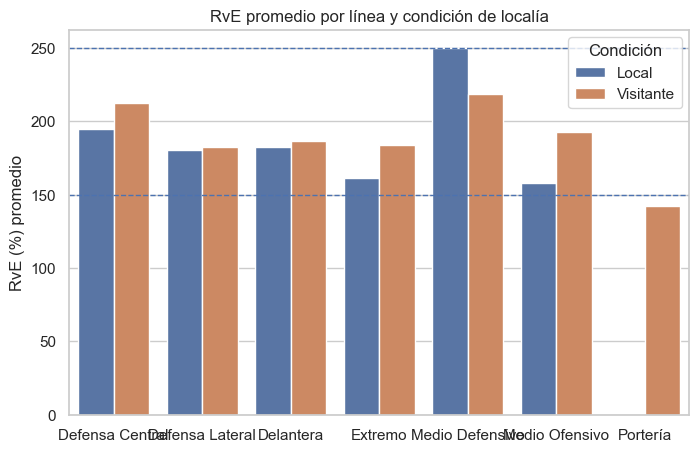

,Local_Visitante,RvE_prom
0,Local,182.746303
1,Visitante,191.499425


In [12]:
# Promedios por Local/Visitante y línea
lv_linea = (df_part
            .dropna(subset=["Local_Visitante"])
            .groupby(["Local_Visitante", "linea"], as_index=False)["RvE_pct"]
            .mean()
            .rename(columns={"RvE_pct":"RvE_prom"}))

plt.figure(figsize=(8,5))
sns.barplot(data=lv_linea, x="linea", y="RvE_prom", hue="Local_Visitante")
plt.axhline(150, linestyle="--", linewidth=1)
plt.axhline(250, linestyle="--", linewidth=1)
plt.title("RvE promedio por línea y condición de localía")
plt.ylabel("RvE (%) promedio")
plt.xlabel("")
plt.legend(title="Condición")
plt.show()

# Global
lv_global = (df_part
             .dropna(subset=["Local_Visitante"])
             .groupby("Local_Visitante", as_index=False)["RvE_pct"]
             .mean()
             .rename(columns={"RvE_pct":"RvE_prom"}))
lv_global.to_csv(f"{export_dir}/local_visitante_global.csv", index=False)
lv_global


### Se generó un gráfico de barras para observar la diferencia de rendimiento según local/visitante. No se encontraron diferencias significativas.

In [14]:
# Conteo de flags por jugador
flags_jugador = (df_part
                 .groupby([col_nombre, "RvE_flag"], as_index=False)
                 .size()
                 .rename(columns={"size":"n"}))
pivot_flags_j = flags_jugador.pivot(index=col_nombre, columns="RvE_flag", values="n").fillna(0).astype(int)
pivot_flags_j["Total"] = pivot_flags_j.sum(axis=1)
pivot_flags_j = pivot_flags_j.sort_values("Total", ascending=False)
pivot_flags_j.to_csv(f"{export_dir}/resumen_flags_por_jugador.csv")
pivot_flags_j.head(10)

# Conteo de flags por línea
flags_linea = (df_part
               .groupby(["linea", "RvE_flag"], as_index=False)
               .size()
               .rename(columns={"size":"n"}))
pivot_flags_l = flags_linea.pivot(index="linea", columns="RvE_flag", values="n").fillna(0).astype(int)
pivot_flags_l["Total"] = pivot_flags_l.sum(axis=1)
pivot_flags_l.to_csv(f"{export_dir}/resumen_flags_por_linea.csv")
pivot_flags_l


RvE_flag,<50% (muy por debajo),Normal,Total
linea,,,
Defensa Central,1,19,20
Defensa Lateral,3,25,28
Delantera,3,17,20
Extremo,6,35,41
Medio Defensivo,1,17,18
Medio Ofensivo,3,14,17
Portería,0,4,4


In [19]:
import numpy as np
import pandas as pd

# --- Asegurar tipos/fechas ---
df_part = df_part.copy()
df_ent  = df_ent.copy()
df_part["Fecha"] = pd.to_datetime(df_part["Fecha"], errors="coerce")
df_ent["Fecha"]  = pd.to_datetime(df_ent["Fecha"], errors="coerce")

# Por si los ids vienen mezclados
for _df in (df_part, df_ent):
    if "id_jugador" in _df.columns:
        _df["id_jugador"] = pd.to_numeric(_df["id_jugador"], errors="coerce").astype("Int64")

# Detectar el nombre real de la columna de rendimiento de ENTRENOS
def pick(colnames, *cands):
    low = {c.lower(): c for c in colnames}
    for c in cands:
        if c in colnames: return c
        if c.lower() in low: return low[c.lower()]
    return None

COL_REND_E = pick(df_ent.columns, "Rendimiento_Diario", "Rendimiento_Partido")  # fallback por si no está el diario
COL_REND_P = pick(df_part.columns, "Rendimiento_Partido")

assert COL_REND_P is not None, "No encuentro Rendimiento_Partido en df_part"
assert COL_REND_E is not None, "No encuentro rendimiento de entrenos en df_ent (Rendimiento_Diario)"

# --- Precomputos por jugador para acelerar lookups ---
# Para cada jugador: DF de entrenos con fecha y rendimiento
ent_por_jugador = {
    jid: g.sort_values("Fecha")[["Fecha", COL_REND_E]].rename(columns={COL_REND_E: "rend_e"})
    for jid, g in df_ent.dropna(subset=["id_jugador", "Fecha", COL_REND_E]).groupby("id_jugador")
}

# Promedio histórico por jugador (fallback final)
hist_mu = {
    jid: g["rend_e"].mean()
    for jid, g in ent_por_jugador.items()
}

def baseline_entreno(jid, fpart, win_days=21, fallback_days=60, k_min=1):
    """Baseline = promedio de Rendimiento de ENTRENOS en la ventana previa al partido.
       21 días -> si vacío, 60 días -> si vacío, histórico. Devuelve np.nan si no hay nada.
    """
    g = ent_por_jugador.get(jid)
    if g is None or pd.isna(fpart):
        return np.nan
    f_ini = fpart - pd.Timedelta(days=win_days)
    w = g[(g["Fecha"] >= f_ini) & (g["Fecha"] < fpart)]
    if len(w) >= k_min and w["rend_e"].notna().any():
        return float(w["rend_e"].mean())

    # Fallback 60 días
    f_ini2 = fpart - pd.Timedelta(days=fallback_days)
    w2 = g[(g["Fecha"] >= f_ini2) & (g["Fecha"] < fpart)]
    if len(w2) >= k_min and w2["rend_e"].notna().any():
        return float(w2["rend_e"].mean())

    # Fallback histórico
    mu = hist_mu.get(jid, np.nan)
    return float(mu) if pd.notna(mu) else np.nan

# --- RvE "raw" on the fly (sin agregar columna permanente) ---
thr_high = 300
thr_low  = 50

# Construimos una Serie temporal alineada a df_part con el baseline
base_vals = []
for jid, fpart in zip(df_part["id_jugador"], df_part["Fecha"]):
    base_vals.append(baseline_entreno(jid, fpart))

baseline_series = pd.Series(base_vals, index=df_part.index, dtype="float")

# rve_raw (sin clip) para el filtro
rve_raw = 100.0 * (df_part[COL_REND_P] / baseline_series)

# Tabla de outliers (usando rve_raw), sin tocar df_part
cols_minimas = ["Fecha", "Rival", "Local_Visitante", COL_REND_P]
if "linea" in df_part.columns: cols_minimas.append("linea")
# detectar la columna de nombre de jugador si está
for c in ["nombre", "Nombre", "jugador", "Jugador"]:
    if c in df_part.columns:
        col_nombre = c
        cols_minimas.append(c)
        break
else:
    col_nombre = None

mask = (rve_raw >= thr_high) | (rve_raw <= thr_low)
outliers = df_part.loc[mask, cols_minimas].copy()
outliers.insert(len(cols_minimas), "RvE_raw", rve_raw[mask].round(3))
outliers = outliers.sort_values("RvE_raw", ascending=False)

# Top 20 más altos
outliers_altos = outliers.sort_values("RvE_raw", ascending=False).head(20)

# Top 20 más bajos
outliers_bajos = outliers.sort_values("RvE_raw", ascending=True).head(20)

display(outliers_altos)
display(outliers_bajos)


,Fecha,Rival,Local_Visitante,Rendimiento_Partido,linea,nombre,RvE_raw
75,2025-08-10,SANTOS,Visitante,100.000000,Medio Ofensivo,Luis Romo,802.641
71,2025-08-07,CINCINNATI,Visitante,100.000000,Medio Ofensivo,Luis Romo,786.603
134,2025-08-30,CRUZ AZUL,Local,100.000000,Delantera,Armando González,683.878
121,2025-08-22,XOLOS,Visitante,100.000000,Medio Ofensivo,Luis Romo,632.817
143,2025-08-30,CRUZ AZUL,Local,100.000000,Medio Ofensivo,Luis Romo,608.349
140,2025-08-30,CRUZ AZUL,Local,96.630274,Medio Defensivo,Erick Gutiérrez,546.758
106,2025-08-22,XOLOS,Visitante,100.000000,Medio Defensivo,Erick Gutiérrez,542.604
70,2025-08-03,CHARLOTTE,Visitante,100.000000,Medio Ofensivo,Luis Romo,535.236
120,2025-08-16,C. JUAREZ,Local,88.510604,Medio Ofensivo,Luis Romo,504.635
129,2025-08-22,XOLOS,Visitante,100.000000,Delantera,Armando González,492.187


,Fecha,Rival,Local_Visitante,Rendimiento_Partido,linea,nombre,RvE_raw
89,2025-07-19,LEON,Visitante,0.000000,Medio Ofensivo,Santiago Sandoval,0.000
27,2025-08-03,CHARLOTTE,Visitante,0.000000,Extremo,Cade Cowell,0.000
141,2025-08-30,CRUZ AZUL,Local,0.000000,Extremo,Hugo Camberos,0.000
119,2025-08-22,XOLOS,Visitante,0.000000,Extremo,Richard Ledezma,0.000
98,2025-08-16,C. JUAREZ,Local,1.708203,Defensa Lateral,Miguel Gómez,5.016
18,2025-07-19,LEON,Visitante,2.005272,Delantera,Armando González,5.612
32,2025-08-10,SANTOS,Visitante,1.773823,Extremo,Cade Cowell,7.777
91,2025-08-07,CINCINNATI,Visitante,3.168765,Delantera,Teun Wilke,8.138
61,2025-07-26,SAN LUIS,Local,6.430394,Extremo,Hugo Camberos,14.873
81,2025-08-03,CHARLOTTE,Visitante,5.552303,Defensa Lateral,Miguel Gómez,15.347


### En estas tablas podemos visulizar los outleiers respecto al rendimiento_vs_entreno. Si bien en nuestra tabla se le puso un tope de 250 a ReV. Se olvió a calcular sin tope para mostrar los outleiers altos. Momentos en los que los jugadores rindieron muy por encima de la carga que realizan en los entrenamiento. Esto puede suceder porque, hay pocos registros en los entrenamientos, porque el jugador no se exige tando o porque el partido le requirió un degaste excesivo (lo que podría generar riesgo desobrecarga muscular y lesión)

In [16]:
# KPIs por jugador: promedio RvE, % partidos ≥150, ≥250, partidos, y promedio Rendimiento_Partido
def kpis_jugador(df):
    g = df.groupby("id_jugador", as_index=False).agg(
        partidos=("RvE_pct", "count"),
        rve_prom=("RvE_pct", "mean"),
        rve_p90=("RvE_pct", lambda s: np.nanpercentile(s.dropna(), 90) if s.notna().any() else np.nan),
        rve_ge150=("RvE_pct", lambda s: (s>=150).mean() if s.notna().any() else np.nan),
        rve_ge250=("RvE_pct", lambda s: (s>=250).mean() if s.notna().any() else np.nan),
        rend_part_prom=("Rendimiento_Partido", "mean"),
    )
    # Nombre/posición/línea
    meta = df.groupby("id_jugador")[[col_nombre,  "linea"]].agg(lambda s: s.dropna().iloc[0] if s.dropna().any() else np.nan)
    meta = meta.reset_index()
    out = meta.merge(g, on="id_jugador", how="right")
    out["rve_ge150"] = (out["rve_ge150"]*100).round(1)
    out["rve_ge250"] = (out["rve_ge250"]*100).round(1)
    return out.sort_values(["rve_prom","rve_p90","partidos"], ascending=[False, False, False])

kpis = kpis_jugador(df_part)
kpis.to_csv(f"{export_dir}/kpis_partidos_por_jugador.csv", index=False)
kpis


,id_jugador,nombre,linea,partidos,rve_prom,rve_p90,rve_ge150,rve_ge250,rend_part_prom
14,18,Luis Romo,Medio Ofensivo,9,250.000000,250.000000,100.0,100.0,96.331706
15,19,Daniel Aguirre,Medio Defensivo,7,250.000000,250.000000,100.0,100.0,81.647483
3,6,Miguel Tapias,Defensa Central,2,250.000000,250.000000,100.0,100.0,90.076135
10,14,Omar Govea,Medio Defensivo,2,250.000000,250.000000,100.0,100.0,89.517437
12,16,Isaác Brisuela,Extremo,2,250.000000,250.000000,100.0,100.0,66.979613
2,5,Gilberto Sepulveda,Defensa Central,6,242.727235,250.000000,100.0,66.7,96.175128
7,10,José Castillo,Defensa Lateral,7,236.844688,250.000000,100.0,71.4,88.261061
13,17,Erick Gutiérrez,Medio Defensivo,7,227.833864,250.000000,85.7,71.4,85.061310
19,23,Alan Pulido,Delantera,6,220.122115,250.000000,83.3,83.3,76.645666
21,25,Roberto Alvarado,Extremo,8,213.686589,250.000000,100.0,25.0,95.849774


### Por último generé una tabla con los kpi de los jugadores, un resumen de sus partidos jugados, los promedios de rendimeinto tanto RvE como rendimeinto_partido